In [6]:
import pandas as pd
import os
import glob

In [7]:
eval_jsonl_list = glob.glob("data/eval_collection/*/*eval.jsonl")
eval_jsonl_list.sort(reverse=True)
eval_jsonl_list

['data/eval_collection/Snowflake+Routing/testset-50q-eval.jsonl',
 'data/eval_collection/Snowflake+Routing+Prune+Rerank/testset-50q-eval.jsonl']

In [14]:
sumdf_list = []
for jsonl in eval_jsonl_list:
    df = pd.read_json(jsonl, lines=True)
    # df['relevance_correct'] = (df['relevance'] >= 1).astype(int)
    sumdf = df[['faithfulness_correct','relevance_correct']].mean()
    sumdf['collection_name'] = jsonl.split("/")[-2]
    sumdf_list.append(sumdf)
sumdf_list = pd.DataFrame(sumdf_list)

In [15]:
sumdf_list

,faithfulness_correct,relevance_correct,collection_name
0,0.571429,0.836735,Snowflake+Routing
1,0.714286,0.846939,Snowflake+Routing+Prune+Rerank


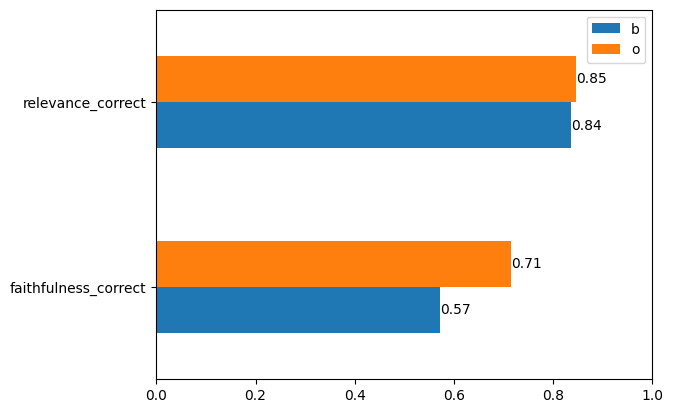

In [ ]:
ax = sumdf_list.set_index("collection_name").T.plot.barh()
for container in ax.containers:
    ax.bar_label(container, fmt="%.2g")
    
ax.set_xlim(0, 1)